# SIM Contrast Test

August 18th, 2015

Sample is nanospheres (fluorosphere) [100 nm diameter](http://www.thermofisher.com/order/catalog/product/F8801?ICID=search-product), 8 different NAs and 42 phases per each of three orientations, 3 repetitions.

In [1]:
%load_ext autoreload
%autoreload 1

#get our environment ready for data analysis times
%pylab inline

#import some os functionality so that we can be platform independent
import os
import copy

#import our ability to read MRC files
from pysegtools.mrc import MRC

#import skimage components
from skimage.external import tifffile as tif #note that this can be achieved by using the skimage.io with
                                                #the tifffile plugin.
#better filtering than skimage
from scipy import ndimage

from scipy.optimize import curve_fit

#import pandas
import pandas as pd

from scipy.ndimage import measurements
from scipy.ndimage.filters import median_filter

import matplotlib.gridspec as gridspec #fancy subplot layout

from matplotlib.path import Path #Needed to create shapes
import matplotlib.patches as patches #needed so show shapes on top of graphs

%aimport peaks.gauss2d
Gauss2D = peaks.gauss2d.Gauss2D

%aimport peaks.utils
detrend_data = peaks.utils.detrend

%aimport peaks.peakfinder
PeakFinder = peaks.peakfinder.PeakFinder

%aimport dphplotting.mip
mip = dphplotting.mip.mip

%aimport peaks.stackanalysis
SIMStackAnalyzer = peaks.stackanalysis.SIMStackAnalyzer

%aimport peaks.lpsvd
LPSVD = peaks.lpsvd.LPSVD
reconstruct_signal = peaks.lpsvd.reconstruct_signal

Populating the interactive namespace from numpy and matplotlib


In [2]:
SIM = tif.imread('testSIM.tif')

(<matplotlib.figure.Figure at 0xabb07b8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000ABC5198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AB92AC8>], dtype=object))

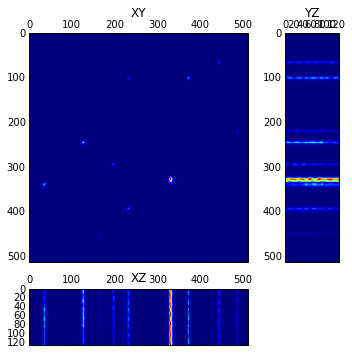

In [3]:
mip(SIM)

In [9]:
mySIM = SIMStackAnalyzer(SIM.astype(float),3,42)

In [10]:
mySIM.peakfinder.prune_blobs(20)

array([[  3.14000000e+02,   4.88000000e+02,   2.00000000e+00,
          1.48000000e+02],
       [  6.60000000e+01,   7.10000000e+01,   2.00000000e+00,
          1.49000000e+02],
       [  1.15000000e+02,   2.48000000e+02,   1.00000000e+00,
          1.69000000e+02],
       [  4.49000000e+02,   1.63000000e+02,   2.00000000e+00,
          2.20300000e+03],
       [  1.02000000e+02,   2.30000000e+02,   2.00000000e+00,
          4.38900000e+03],
       [  2.20000000e+02,   4.84000000e+02,   2.00000000e+00,
          4.50200000e+03],
       [  6.70000000e+01,   4.41000000e+02,   2.00000000e+00,
          6.89900000e+03],
       [  2.94000000e+02,   1.96000000e+02,   2.00000000e+00,
          8.19100000e+03],
       [  3.93000000e+02,   2.31000000e+02,   2.00000000e+00,
          9.94600000e+03],
       [  1.02000000e+02,   3.70000000e+02,   2.00000000e+00,
          1.22190000e+04],
       [  3.39000000e+02,   3.50000000e+01,   2.00000000e+00,
          1.42140000e+04],
       [  2.45000000e

(<matplotlib.figure.Figure at 0x10166dd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x102f98d0>)

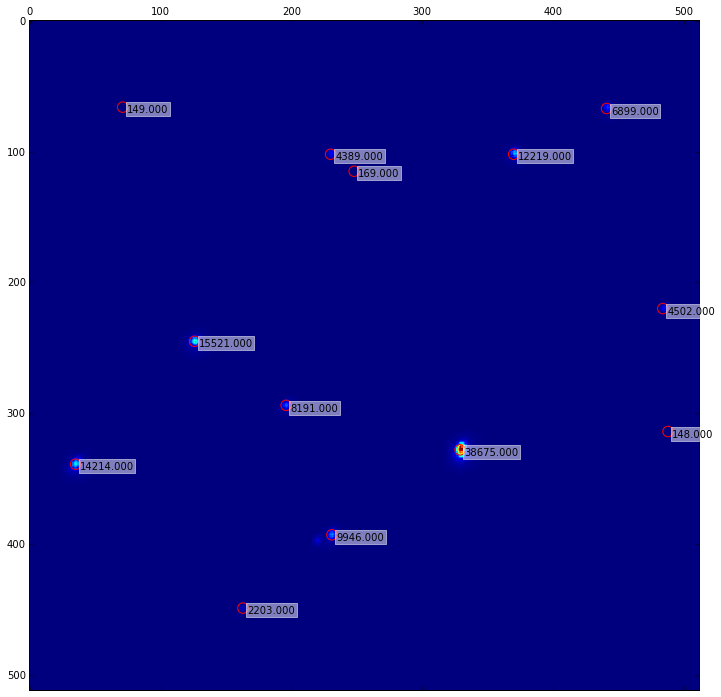

In [11]:
mySIM.peakfinder.plot_blobs()

In [14]:
SIM.shape

(126, 512, 512)

In [13]:
mySIM.fitPeaks(20,4)

multiprocessing engaged with 4 cores


[                          amp      offset   sigma_x   sigma_y          x0  \
 orientation phase                                                           
 0           0        7.318999  104.850460  0.745523  2.444960  488.084492   
             1       10.712624  104.379486  0.998833  2.040850  487.992461   
             2       17.254740  104.514120  0.859051  1.957957  488.133326   
             3             NaN         NaN       NaN       NaN         NaN   
             4             NaN         NaN       NaN       NaN         NaN   
             5             NaN         NaN       NaN       NaN         NaN   
             6             NaN         NaN       NaN       NaN         NaN   
             7       29.896382  105.491413  0.249626  0.536059  484.663505   
             8       11.731306  106.002572  0.139987  1.325269  488.000137   
             9       14.691388  105.266970  0.376864  1.588755  486.646447   
             10      43.394342  105.292056  0.250463  0.611598  

blob [115 248   1 169] is unfittable
multiprocessing engaged with 2 cores
multiprocessing engaged with 3 cores
multiprocessing engaged with 4 cores
multiprocessing engaged with 5 cores
multiprocessing engaged with 6 cores
multiprocessing engaged with 7 cores
multiprocessing engaged with 8 cores
multiprocessing engaged with 9 cores
multiprocessing engaged with 10 cores
multiprocessing engaged with 11 cores
multiprocessing engaged with 12 cores
multiprocessing engaged with 13 cores
multiprocessing engaged with 14 cores
multiprocessing engaged with 15 cores
multiprocessing engaged with 16 cores


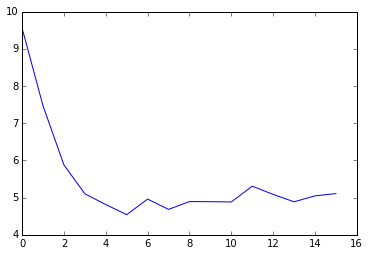

In [23]:
times = []
for i in range(1,17):
    t = time.clock()
    mySIM.fitPeaks(20,i,quiet = True)
    times.append(time.clock()-t)
    
plot(times)

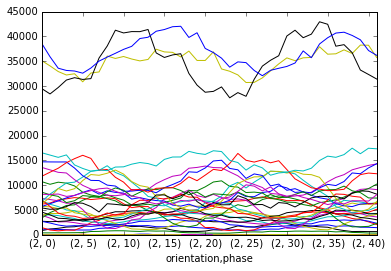

In [10]:
for peak in mySIM.fits:
    for i, orient in peak.groupby(level='orientation'):
        orient.amp.plot()

(<matplotlib.figure.Figure at 0x1418aa90>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000140103C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000149726D8>], dtype=object))

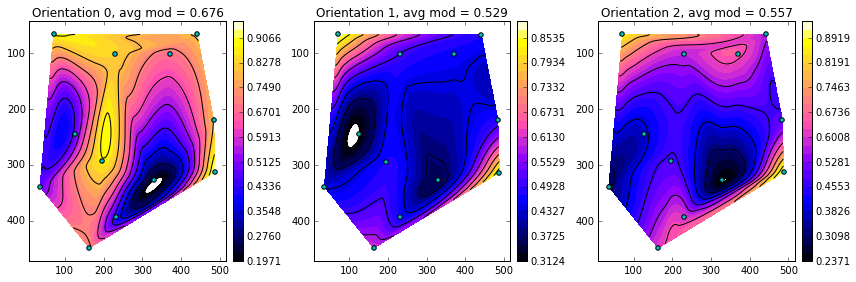

In [12]:
mySIM.calc_sim_params()
mySIM.plot_sim_params()

In [13]:
df = copy.deepcopy(mySIM.fits)

In [14]:
df[0].dropna().head()

amp      offset   sigma_x   sigma_y          x0  \
orientation phase                                                          
0           4      29.896382  105.491413  0.249626  0.536059  484.663505   
            5      11.731306  106.002572  0.139987  1.325269  488.000137   
            6      14.691388  105.266970  0.376864  1.588755  486.646447   
            7      43.394342  105.292056  0.250463  0.611598  487.549383   
            8      42.185487  105.576373  0.258943  0.504482  485.429062   

                           y0  
orientation phase              
0           4      310.838903  
            5      316.634784  
            6      311.494253  
            7      314.478534  
            8      311.028212

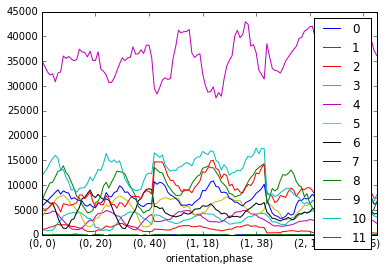

In [15]:
for i,peak in enumerate(df):
    peak.amp.plot(label=i)
    
legend()

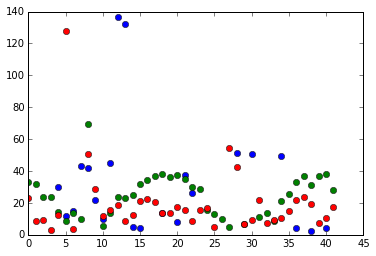

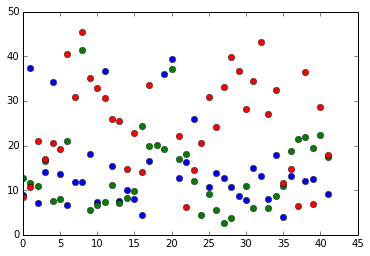

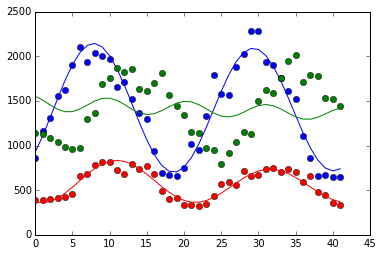

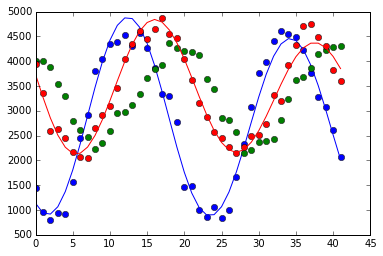

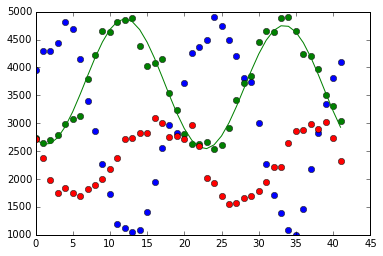

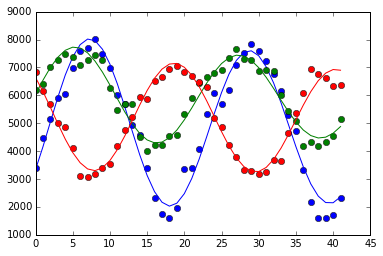

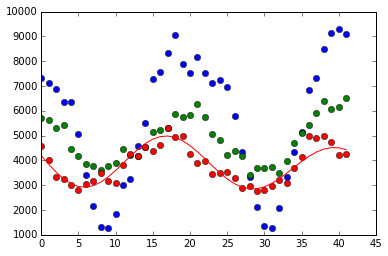

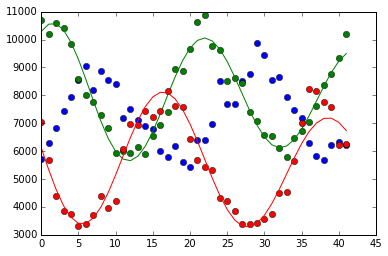

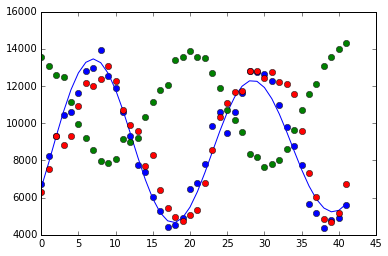

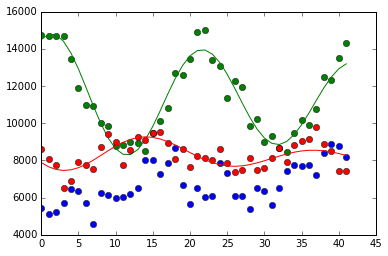

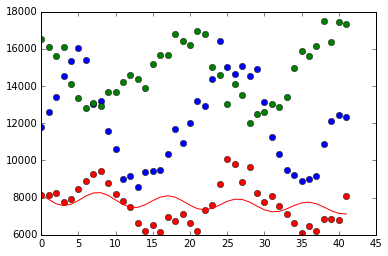

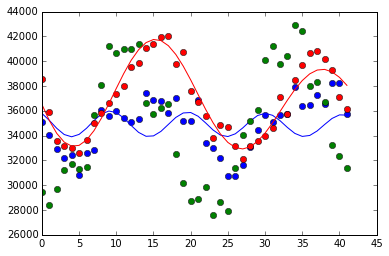

In [16]:
for peak in df:
    figure()
    for i, trace in peak.groupby(level='orientation'):
        #v = np.roll(trace.amp.values,10)
        v = trace.amp.values
        h = plot(v,'o')
        try:
            coef = LPSVD(v,M=4)
            if len(coef) != 3:
                raise ValueError
            plot(reconstruct_signal(coef,v),color=h[0].get_color())
        except ValueError as e:
            pass

# TODO

- fitting of sinusoids
    - start with standard nonlinear fit, then LPSVD as time permits
- allow diagnostics of the fit to be displayed
- display maps of fits

,amp,modulation,offset,orientation,sigma_x,sigma_y,x0,y0
0,33.819871,0.959200,105.886756,0,0.966002,1.265013,487.376449,313.070703
1,24.678082,0.867707,105.477708,1,1.604558,1.864819,488.090235,313.690121
2,19.577880,0.940358,104.825041,2,1.664369,1.383209,488.190034,313.553115
3,14.972552,0.884658,105.172893,0,1.125874,1.938181,70.703074,66.927664
4,13.918947,0.893544,104.450276,1,1.913898,2.239703,70.959056,66.309874
5,24.732019,0.861518,104.503546,2,1.435946,1.802550,70.883664,66.570136
6,1422.939104,0.717064,148.319296,0,1.999485,2.407546,162.901407,448.801267
7,1416.755854,0.606923,147.205255,1,1.995727,2.420924,163.042603,448.727556
8,569.350644,0.610257,120.090172,2,1.982507,2.392442,163.068413,448.732927
9,2835.369965,0.826242,162.954799,0,1.954103,2.009479,230.376373,102.104285


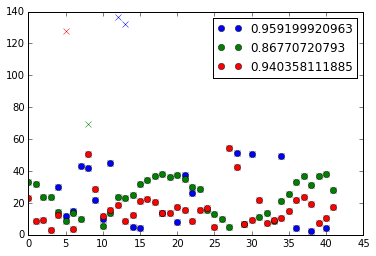

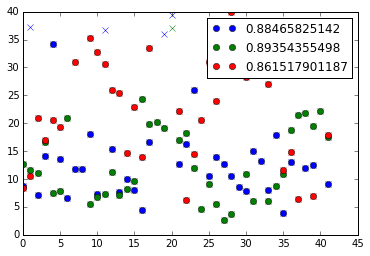

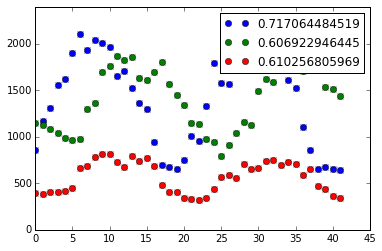

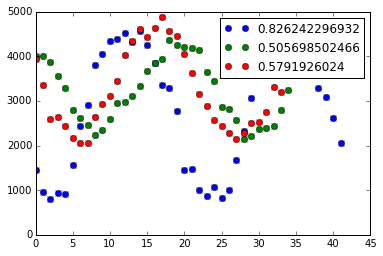

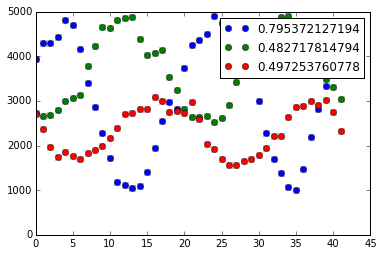

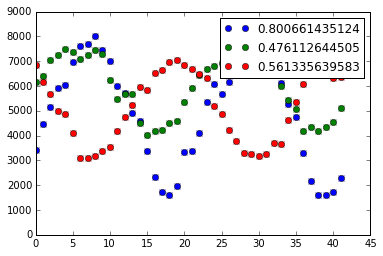

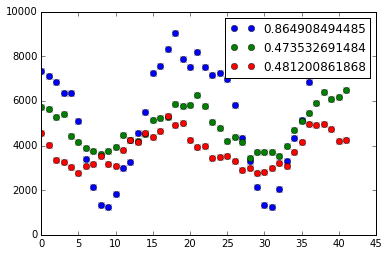

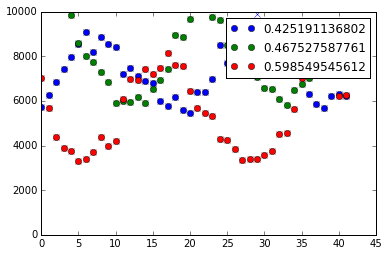

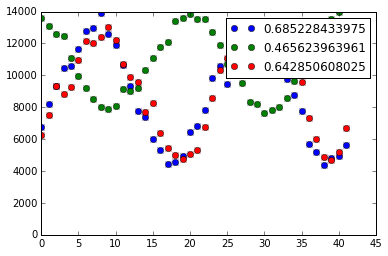

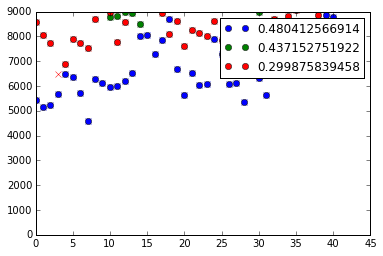

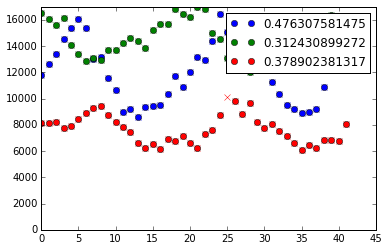

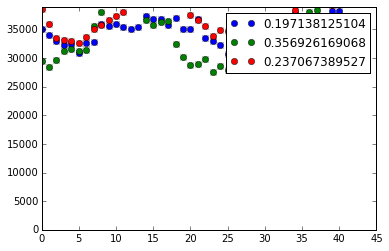

In [17]:
new_df = []
for peak in df:
    figure()
    for i, trace in peak.groupby(level='orientation'):
        #v = np.roll(trace.amp.values,10)
        v = trace.amp.values
        #filter 3 sigma
        s = nanstd(v)
        m = nanmean(v)
        vf = v.copy()
        vf[abs(v-m) > 1.5*sqrt(2)*s] = nan
        h = plot(v,'x')
        mod = (nanmax(vf)-nanmin(vf))/nanmax(vf)
        plot(vf,'o',color=h[0].get_color(),label=mod)
        ylim(ymin=0)
        
        temp = trace.mean().to_dict()
        temp['orientation']=i
        temp['modulation']=mod
        new_df.append(temp)
    
    legend()
    
new_df = pd.DataFrame(new_df)

new_df
        